# Encoding & EDA

In [30]:
# Import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder

In [31]:
# Import and inspect dataset

file_path = '/content/project_data.csv'

df = pd.read_csv(file_path)

print(df.head())

print(df.info())

print(df.describe())

# target variable = successful_sell

   age   b1  b2  c10       c3   c4   c8  dow  employment   i1  ...      i5  \
0   34  yes  no   no    False  new  NaN  fri  management -1.8  ...  5099.1   
1   28  yes  no  yes    False  new  NaN  thu   assistant -1.8  ...  5099.1   
2   55   no  no   no  unknown  new  NaN  tue     leisure  1.4  ...  5228.1   
3   47  yes  no   no    False  new  NaN  mon   assistant -0.1  ...  5195.8   
4   49   no  no   no  unknown  new  NaN  tue   assistant  1.4  ...  5228.1   

   marriage-status  month  n2   n3   n4        n5  n6               school  \
0         divorced    apr   2  530  999  0.001771   0  5 - a decent amount   
1         divorced    may   1  750  999 -1.673152   0            5 - a lot   
2          married    jul   3  600  999  0.927946   0     2 - a little bit   
3          married    nov   1  860  999  0.203013   0            5 - a lot   
4          married    jul   6  620  999  0.990804   0            5 - a lot   

   successful_sell  
0               no  
1              yes  

In [32]:
# Display unique entries

columns_of_interest = ['b1', 'b2', 'c10', 'c3', 'c4', 'c8','dow', 'employment', 'marriage-status', 'month', 'school', 'successful_sell']

for column in columns_of_interest:
    unique_values = df[column].unique()
    print(f"Unique values in column {column}:")
    print(unique_values)
    print("-" * 50)


Unique values in column b1:
['yes' 'no' '-1']
--------------------------------------------------
Unique values in column b2:
['no' 'yes' nan]
--------------------------------------------------
Unique values in column c10:
['no' 'yes']
--------------------------------------------------
Unique values in column c3:
['False' 'unknown' 'True']
--------------------------------------------------
Unique values in column c4:
['new' 'old']
--------------------------------------------------
Unique values in column c8:
[nan 'no' 'yes']
--------------------------------------------------
Unique values in column dow:
['fri' 'thu' 'tue' 'mon' 'wed']
--------------------------------------------------
Unique values in column employment:
['management' 'assistant' 'leisure' 'engineer' 'customer service'
 'laborer' 'student' 'self-employed' 'cleaner' 'none' 'hobbyist' 'unknown']
--------------------------------------------------
Unique values in column marriage-status:
['divorced' 'married' 'single' nan]
-

##Encoding


In [33]:
# Encoding

label_encoders = {}

# Encoding for 'month' - starting at 1
df['month'] = df['month'].astype(str).str.strip().str.lower().map({
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
})

# Encoding for 'dow'
df['dow'] = df['dow'].astype(str).str.strip().str.lower().map({
    'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4, 'sat': 5, 'sun': 6
})

#Encoding for 'school'
df['school'] = (
    df['school']
    .astype(str)
    .str.strip()
    .map({
        '0 - none': 0,
        '1 - almost none': 1,
        '2 - a little bit': 2,
        '3 - a bit more': 3,
        '4 - average amount': 4,
        '5 - a decent amount': 5,
        '5 - a lot': 6
    })
)

# Encoding for 'successful_sell'
df['successful_sell'] = df['successful_sell'].replace({'yes': 1, 'no': 0})

# Encoding for b1, b2, c10, c3, c4, c8
custom_mappings = {
    'yes': 1,
    'no': 0,
    '-1': -1,
    'new': 1,
    'old': 0,
    'True': 1,
    'False': 0,
    'unknown': -1
}
columns_to_map = ['b1', 'b2', 'c10', 'c3', 'c4', 'c8']

for column in columns_to_map:
    # Treat variables as strings and map custom mappings
    df[column] = df[column].astype(str).replace(custom_mappings)

#  Handle NaN and -1
for column in columns_to_map:
    df[column] = df[column].replace('nan', np.nan).replace('-1', -1)

# LabelEncoder for remaining variables
for column in ['employment', 'marriage-status']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

print(df.head())


<ipython-input-33-73e816097aaf>:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['successful_sell'] = df['successful_sell'].replace({'yes': 1, 'no': 0})
<ipython-input-33-73e816097aaf>:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].astype(str).replace(custom_mappings)
<ipython-input-33-73e816097aaf>:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the

   age  b1   b2  c10  c3  c4  c8  dow  employment   i1  ...      i5  \
0   34   1  0.0    0   0   1 NaN    4           7 -1.8  ...  5099.1   
1   28   1  0.0    1   0   1 NaN    3           0 -1.8  ...  5099.1   
2   55   0  0.0    0  -1   1 NaN    1           6  1.4  ...  5228.1   
3   47   1  0.0    0   0   1 NaN    0           0 -0.1  ...  5195.8   
4   49   0  0.0    0  -1   1 NaN    1           0  1.4  ...  5228.1   

   marriage-status  month  n2   n3   n4        n5  n6  school  successful_sell  
0                0      4   2  530  999  0.001771   0     5.0                0  
1                0      5   1  750  999 -1.673152   0     6.0                1  
2                1      7   3  600  999  0.927946   0     2.0                0  
3                1     11   1  860  999  0.203013   0     6.0                0  
4                1      7   6  620  999  0.990804   0     6.0                0  

[5 rows x 23 columns]


<ipython-input-33-73e816097aaf>:54: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace('nan', np.nan).replace('-1', -1)


##EDA

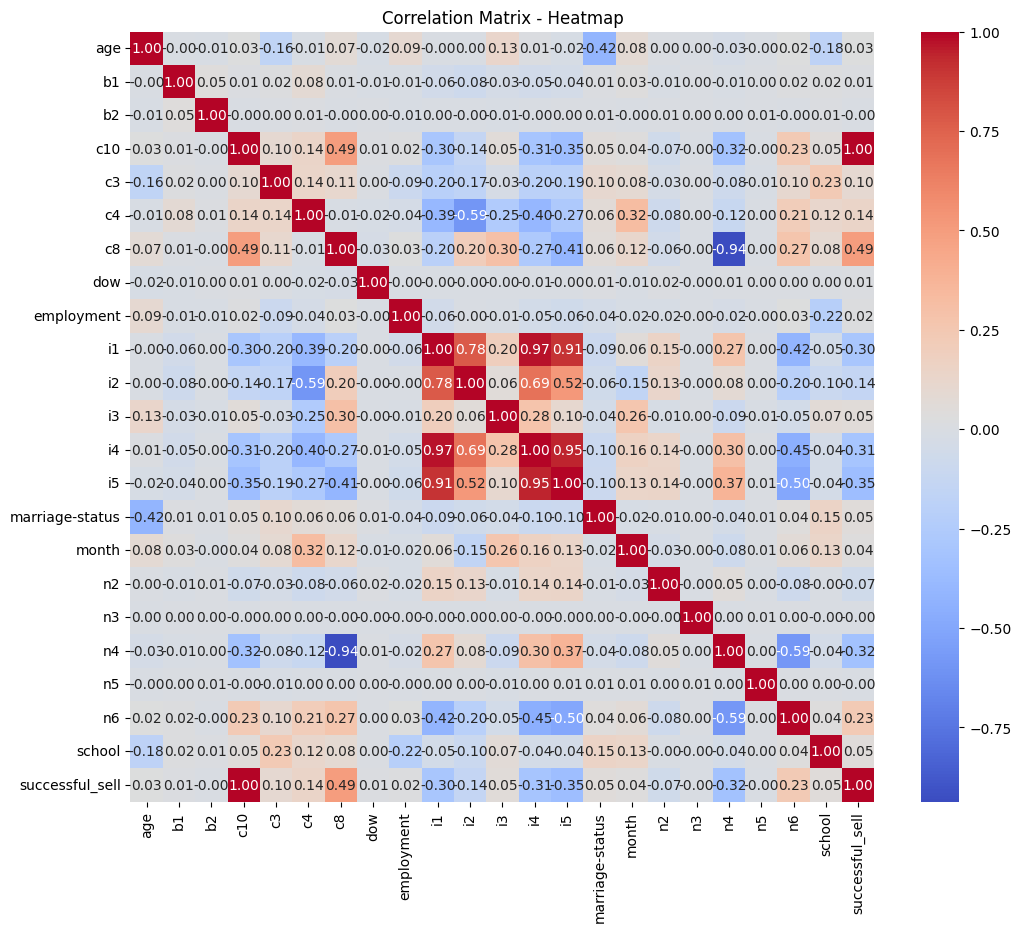

In [34]:
# Correlation matrix - Heatmap

corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Heatmap')
plt.show()

In [35]:
# Count unsuccessful vs successful sells

df['successful_sell'] = df['successful_sell'].apply(lambda x: x if x in [1, 0] else np.nan)

count_1 = df['successful_sell'].value_counts().get(1, 0)
count_0 = df['successful_sell'].value_counts().get(0, 0)
count_nan = df['successful_sell'].isna().sum()

print("Count of '1' (successful sells):", count_1)
print("Count of '0' (unsuccessful sells):", count_0)
print("Count of NaN (missing or invalid entries):", count_nan)


Count of '1' (successful sells): 4640
Count of '0' (unsuccessful sells): 36548
Count of NaN (missing or invalid entries): 0


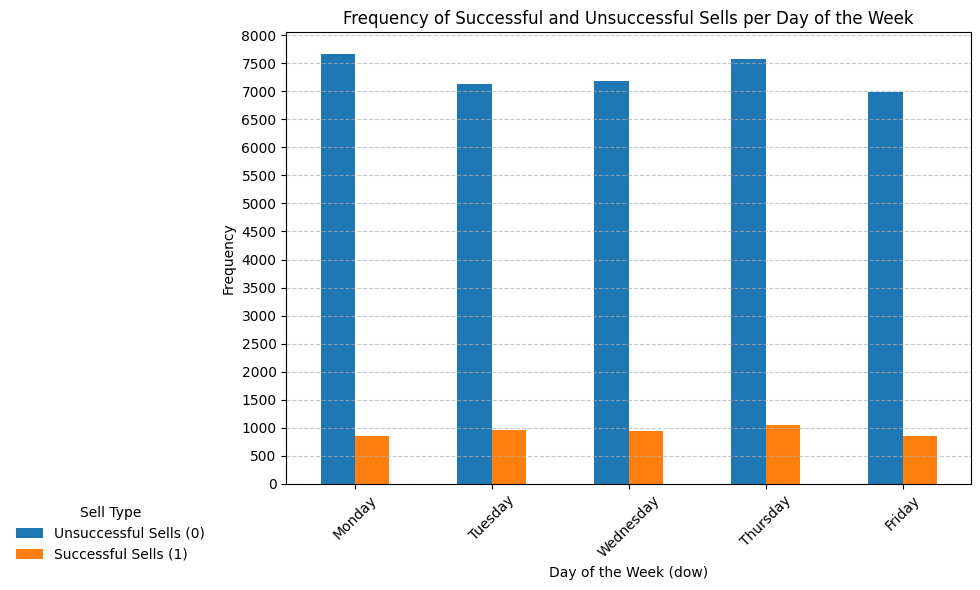

In [36]:
# Plot frequency of successful and unsuccessful sells per day of the week

filtered_df = df[df['successful_sell'].isin([1, 0])]

result = filtered_df.groupby(['dow', 'successful_sell']).size().unstack(fill_value=0)

result.columns = ['Unsuccessful Sells (0)', 'Successful Sells (1)']

dow_labels = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
result.index = result.index.map(dow_labels)

ax = result.plot(kind='bar', figsize=(10, 6))

# Customize y-axis ticks for better precision

y_max = result.values.max().max()
y_ticks = np.arange(0, y_max + 500, 500)
plt.yticks(y_ticks)

plt.legend(title='Sell Type', loc='lower right', bbox_to_anchor=(-0.1, -0.2), ncol=1, frameon=False)

plt.title('Frequency of Successful and Unsuccessful Sells per Day of the Week')
plt.xlabel('Day of the Week (dow)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [37]:
# Display number of successful and unsuccessful occurrences per day of the week

filtered_df = df[df['successful_sell'].isin([1, 0])]

result = filtered_df.groupby(['dow', 'successful_sell']).size().unstack(fill_value=0)

result.columns = ['Unsuccessful Sells (0)', 'Successful Sells (1)']

dow_labels = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
result.index = result.index.map(dow_labels)

print("Number of successful and unsuccessful occurrences per day of the week:")
print(result)


Number of successful and unsuccessful occurrences per day of the week:
           Unsuccessful Sells (0)  Successful Sells (1)
dow                                                    
Monday                       7667                   847
Tuesday                      7137                   953
Wednesday                    7185                   949
Thursday                     7578                  1045
Friday                       6981                   846


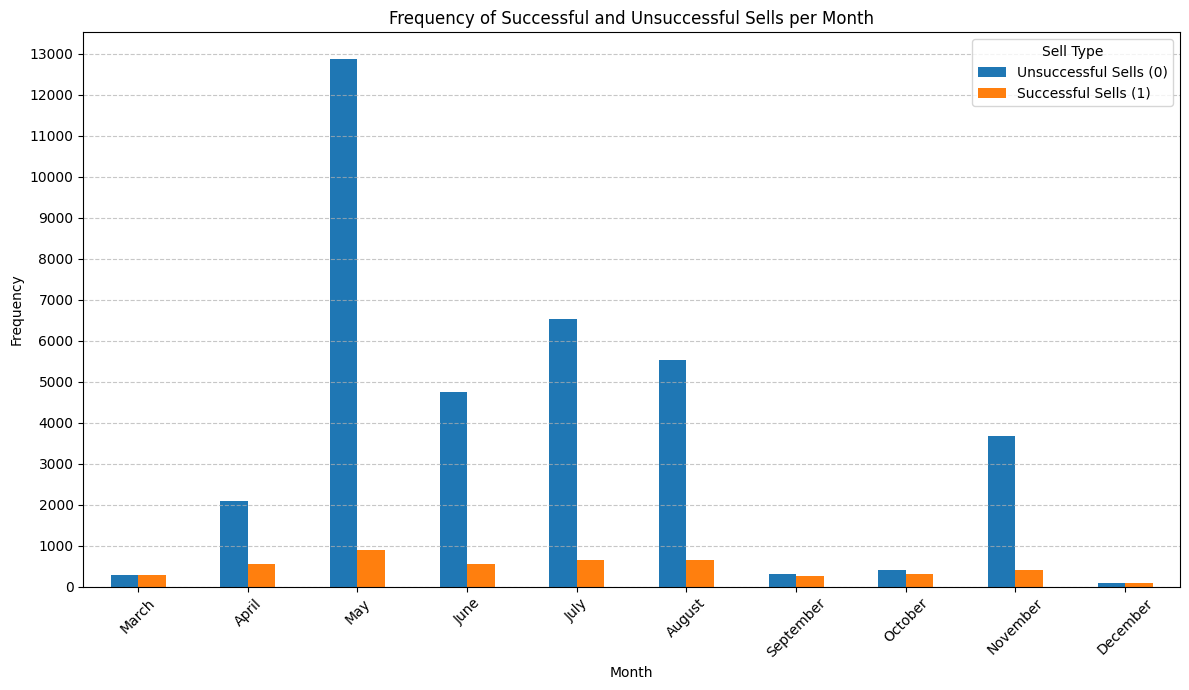

In [38]:
# Plot frequency of successful and unsuccessful sells per month

filtered_df = df[df['successful_sell'].isin([1, 0])]

result = filtered_df.groupby(['month', 'successful_sell']).size().unstack(fill_value=0)

result.columns = ['Unsuccessful Sells (0)', 'Successful Sells (1)']

month_labels = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
result.index = result.index.map(month_labels)

ax = result.plot(kind='bar', figsize=(12, 7))

y_max = result.values.max().max()
y_ticks = np.arange(0, y_max + 1000, 1000)
plt.yticks(y_ticks)

plt.title('Frequency of Successful and Unsuccessful Sells per Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Sell Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [39]:
# Percentage of successful sells by month (relative to total rows per month)
if 'month' in df.columns and 'successful_sell' in df.columns:
    percentage_success_by_month_total = (
        df[df['successful_sell'] == 1]
        .groupby('month')
        .size()
        .div(df.groupby('month').size())
        .reset_index(name='success_rate')
    )
    percentage_success_by_month_total['success_rate'] *= 100

    print("Percentage of Successful Sells (Relative to Total Rows) by Month:")
    print(percentage_success_by_month_total)
else:
    print("Columns 'month' and/or 'successful_sell' not found in the dataframe.")


Percentage of Successful Sells (Relative to Total Rows) by Month:
   month  success_rate
0      3     50.549451
1      4     20.478723
2      5      6.434745
3      6     10.511470
4      7      9.046557
5      8     10.602137
6      9     44.912281
7     10     43.871866
8     11     10.143867
9     12     48.901099


In [40]:
print("Unique values in 'month':", df['month'].unique())
print("Counts of rows for each month:\n", df['month'].value_counts())


Unique values in 'month': [ 4  5  7 11  6  3  8 10  9 12]
Counts of rows for each month:
 month
5     13769
7      7174
8      6178
6      5318
11     4101
4      2632
10      718
9       570
3       546
12      182
Name: count, dtype: int64


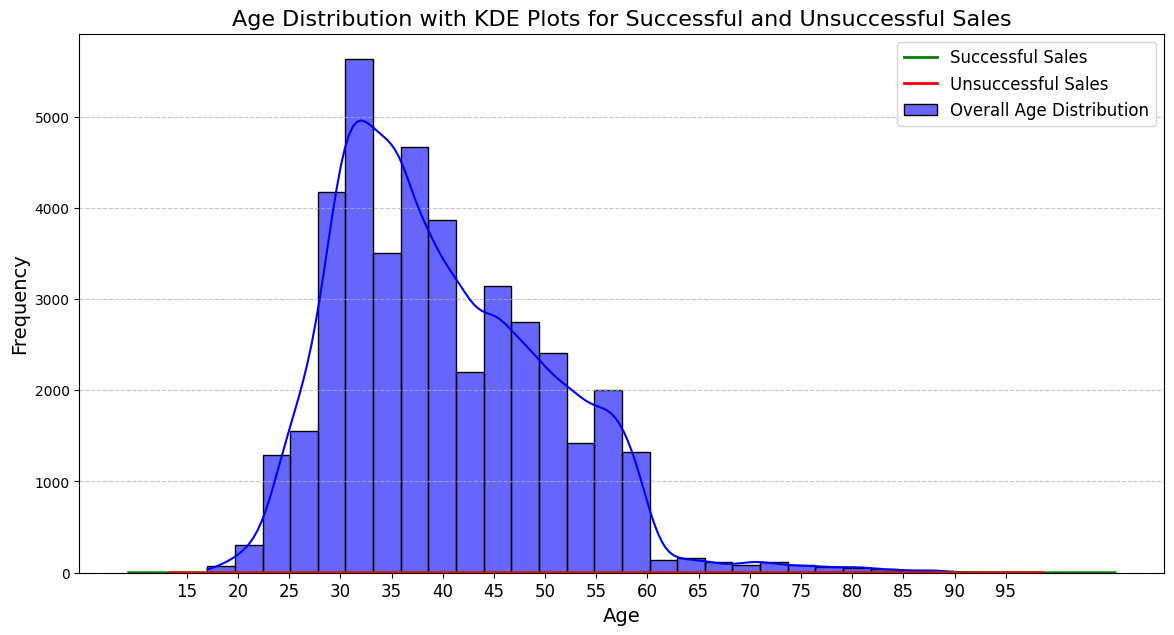

In [41]:
# Age Distribution with KDE Plots for Successful and Unsuccessful Sales

if 'age' in df.columns and 'successful_sell' in df.columns:
    plt.figure(figsize=(14, 7))

    sns.histplot(df['age'], kde=True, bins=30, color="blue", alpha=0.6, label="Overall Age Distribution")

    sns.kdeplot(df[df['successful_sell'] == 1]['age'], color="green", label="Successful Sales", lw=2)
    sns.kdeplot(df[df['successful_sell'] == 0]['age'], color="red", label="Unsuccessful Sales", lw=2)

    plt.title('Age Distribution with KDE Plots for Successful and Unsuccessful Sales', fontsize=16)
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(ticks=range(int(df['age'].min() // 5 * 5), int(df['age'].max() // 5 * 5) + 5, 5), fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()
else:
    print("Columns 'age' and/or 'successful_sell' not found in the dataframe.")



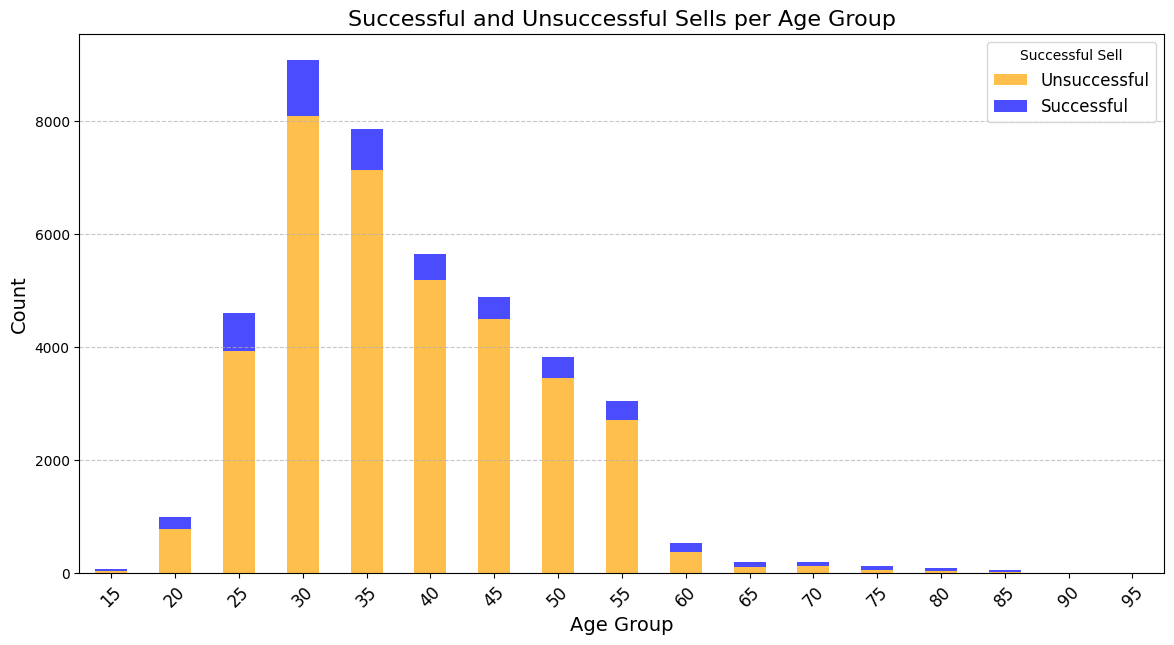

In [42]:
# Stacked Bar Graph - Successful and Unsuccessful Sells per Age Group

if 'age' in df.columns and 'successful_sell' in df.columns:
    # Create age groups in increments of 5 years
    df['age_group'] = (df['age'] // 5) * 5

    age_group_success_counts = df.groupby(['age_group', 'successful_sell']).size().reset_index(name='count')
    pivot_data = age_group_success_counts.pivot(index='age_group', columns='successful_sell', values='count').fillna(0)

    pivot_data.plot(
        kind='bar',
        stacked=True,
        figsize=(14, 7),
        color=['orange', 'blue'],
        alpha=0.7
    )

    plt.title('Successful and Unsuccessful Sells per Age Group', fontsize=16)
    plt.xlabel('Age Group', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=12, rotation=45)
    plt.legend(title='Successful Sell', labels=['Unsuccessful', 'Successful'], fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()
else:
    print("Columns 'age' and/or 'successful_sell' not found in the dataframe.")

<Figure size 1600x900 with 0 Axes>

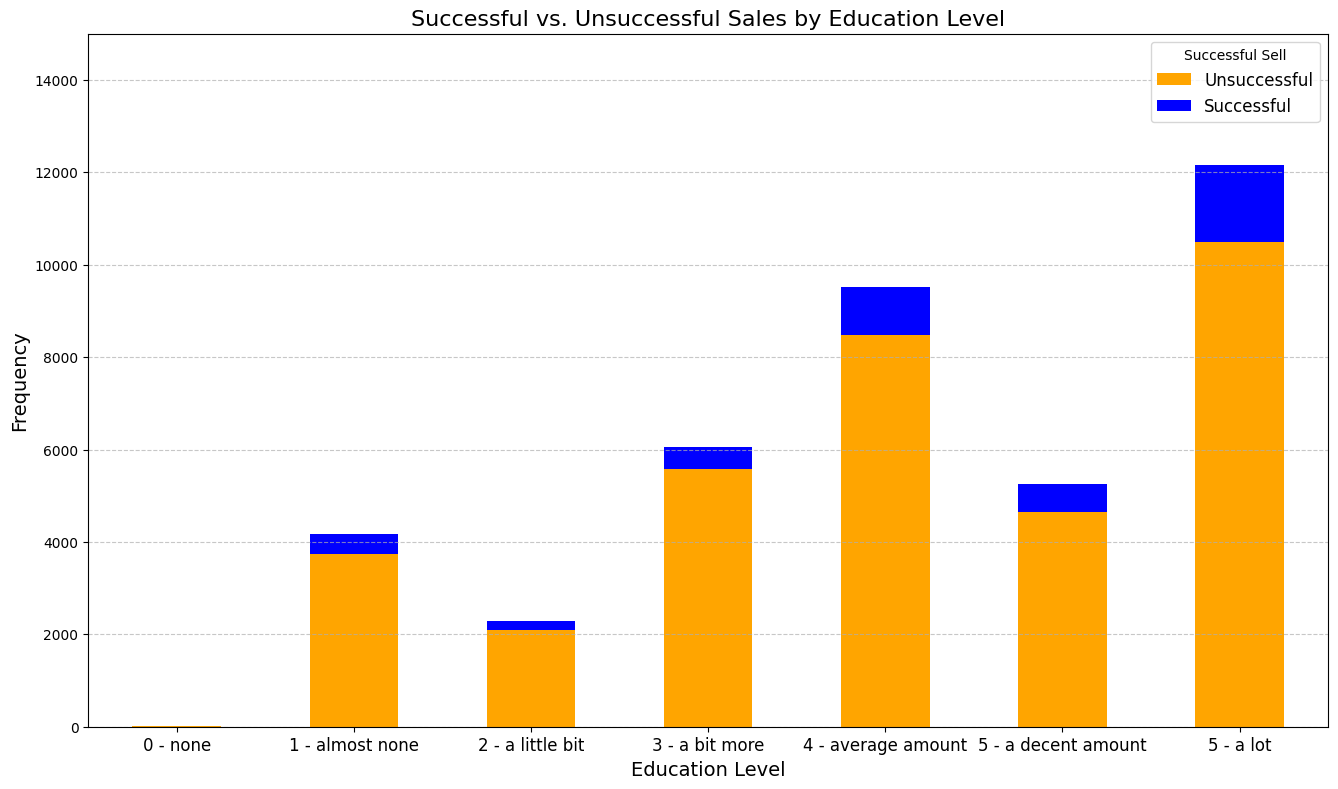

In [43]:
# Successful vs. Unsuccessful Sales by Education Level

if 'school' in df.columns and 'successful_sell' in df.columns:
    edu_success_counts = (
        df.groupby(['school', 'successful_sell'])
        .size()
        .reset_index(name='count')
    )

    plt.figure(figsize=(16, 9))

    pivot_data = edu_success_counts.pivot(index='school', columns='successful_sell', values='count').fillna(0)
    pivot_data.plot(
        kind='bar',
        stacked=True,
        figsize=(16, 9),
        color=['orange', 'blue']
    )

    plt.title('Successful vs. Unsuccessful Sales by Education Level', fontsize=16)
    plt.xlabel('Education Level', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(
        ticks=range(len(pivot_data.index)),
        labels=[
            '0 - none',
            '1 - almost none',
            '2 - a little bit',
            '3 - a bit more',
            '4 - average amount',
            '5 - a decent amount',
            '5 - a lot'
        ],
        rotation=0,
        fontsize=12
    )
    plt.legend(title='Successful Sell', fontsize=12, labels=['Unsuccessful', 'Successful'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.ylim(0, 15000)

    plt.show()
else:
    print("Columns 'school' and/or 'successful_sell' not found in the dataframe.")



In [44]:
# Successful and unsuccessful sells per marriage status

encoder = label_encoders['marriage-status']
mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Marriage-status mapping:")
print(mapping)


Marriage-status mapping:
{'divorced': 0, 'married': 1, 'nan': 2, 'single': 3}


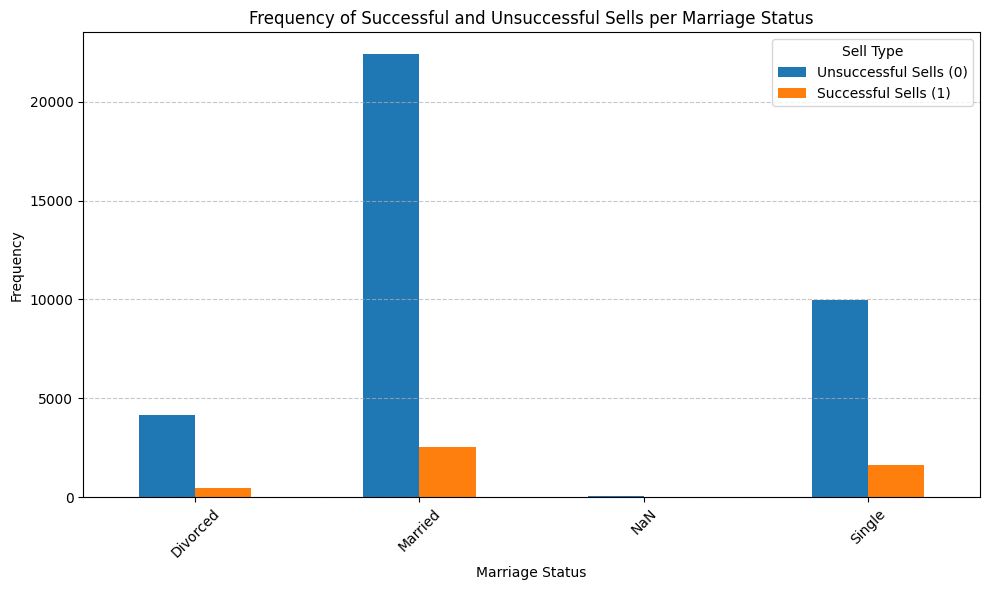

In [45]:
# Successful and unsuccessful sells per marriage status - graph

filtered_df = df[df['successful_sell'].isin([1, 0])]

result = filtered_df.groupby(['marriage-status', 'successful_sell']).size().unstack(fill_value=0)

result.columns = ['Unsuccessful Sells (0)', 'Successful Sells (1)']

marriage_status_labels = {0: 'Divorced', 1: 'Married', 2: 'NaN', 3: 'Single'}
result.index = result.index.map(marriage_status_labels)

ax = result.plot(kind='bar', figsize=(10, 6))

plt.title('Frequency of Successful and Unsuccessful Sells per Marriage Status')
plt.xlabel('Marriage Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Sell Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [46]:
# Successful and unsuccessful sells per "employment"

encoder = label_encoders['employment']
mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Marriage-status mapping:")
print(mapping)

Marriage-status mapping:
{'assistant': 0, 'cleaner': 1, 'customer service': 2, 'engineer': 3, 'hobbyist': 4, 'laborer': 5, 'leisure': 6, 'management': 7, 'none': 8, 'self-employed': 9, 'student': 10, 'unknown': 11}


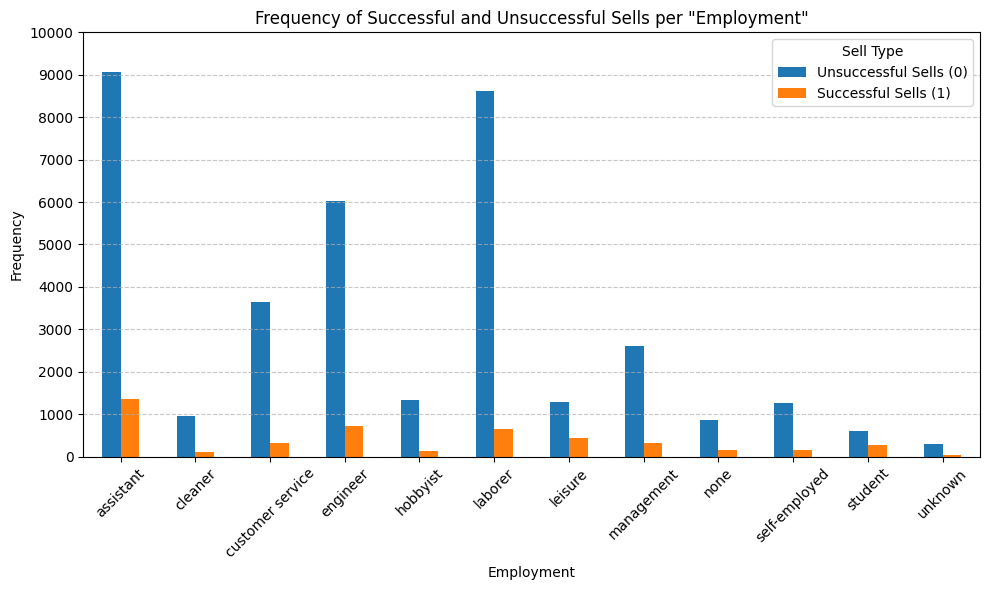

In [47]:
# Successful and unsuccessful sells per "employment" - graph

filtered_df = df[df['successful_sell'].isin([1, 0])]

result = filtered_df.groupby(['employment', 'successful_sell']).size().unstack(fill_value=0)

result.columns = ['Unsuccessful Sells (0)', 'Successful Sells (1)']

employment_labels = {0: 'assistant', 1: 'cleaner', 2: 'customer service', 3: 'engineer', 4: 'hobbyist', 5: 'laborer', 6: 'leisure', 7: 'management', 8: 'none', 9: 'self-employed', 10: 'student', 11: 'unknown'}
result.index = result.index.map(employment_labels)

ax = result.plot(kind='bar', figsize=(10, 6))

y_max = result.values.max().max()
y_ticks = np.arange(0, y_max + 1000, 1000)
plt.yticks(y_ticks)

plt.title('Frequency of Successful and Unsuccessful Sells per "Employment"')
plt.xlabel('Employment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Sell Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [48]:
# Drop column c10, due to correlation of 1.0 with target variable

df1 = df.drop(columns=['c10'])

In [49]:
# Save the DataFrame to a CSV file - if desired at this step
df1.to_csv('encoded_df1.csv', index=False)

# Download the CSV file - if desired at this step
# Edit according to environment

from google.colab import files
files.download('encoded_df1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>